In [61]:
# 1 라이브러리 임포트

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Rescaling
import keras

# 모델생성 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 스플릿,스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [62]:
# 1 데이터 불러오기 
path = "../Playground Series Season 3, Episode 3/playground-series-s3e3/"

train_csv = pd.read_csv(path+"train.csv")
test_csv = pd.read_csv(path+"test.csv")

In [63]:
# 2. 데이터 조회해보기
# y 값은 Attriton 이고 바이너리 
train_csv.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [64]:
# 3. 데이터 의 문자열 값 조회
print(np.unique(train_csv.BusinessTravel,return_counts=1),"\n",
np.unique(train_csv.Department,return_counts=1),"\n",
np.unique(train_csv.EducationField,return_counts=1))


(array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object), array([ 126,  261, 1290], dtype=int64)) 
 (array(['Human Resources', 'Research & Development', 'Sales'], dtype=object), array([  39, 1167,  471], dtype=int64)) 
 (array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object), array([ 13, 775, 152, 549,  82, 106], dtype=int64))


In [65]:
# 4. 데이터의 결측치 확인
train_csv.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [66]:
# 학습데이터의 고유값 조회
train_csv.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [67]:
# 값이 1개인 칼럼만을 조회
train_csv.nunique()[train_csv.nunique() == 1]

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [68]:
# 값이 1개인 칼럼 삭제
train_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)
test_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)

In [69]:
train_csv = pd.get_dummies(train_csv)
test_csv = pd.get_dummies(test_csv)

In [70]:
# train 의 칼럼이 56개로 늘어남 ㄷㄷ
print(train_csv.shape,test_csv.shape)

(1677, 52) (1119, 51)


In [71]:
x = train_csv.drop(["Attrition"],axis=1)
y = train_csv.Attrition

In [72]:
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Concatenate, Add, BatchNormalization, LeakyReLU

from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.metrics import classification_report


In [73]:
models = []
preds = []

class_weight = 10 

n_folds = 10 
repeats = 10  
dr = 0.2     

# k_fold = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42)

def get_model():
    model = keras.Sequential([
    layers.Dense(512), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(256), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(128), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(64), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.BatchNormalization(),
    layers.Dense(32), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(16), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(8),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(4), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(2), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(1, activation='sigmoid')
   ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(
    optimizer=opt,
        loss=tfa.losses.SigmoidFocalCrossEntropy(
                                             alpha=0.8,
                                             gamma=2.0
                                             ),
        metrics='AUC',
)
    
    return model



early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)
plat = keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)


for train_index, test_index in k_fold.split(x, y):
    X_train, X_valid = x.iloc[train_index], x.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = get_model()

    history = model.fit(
          X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=64,
          epochs=500,
          class_weight = { 0: 1.0, 1: class_weight, },
          callbacks=[early_stopping, plat],
          verbose=1
         )
    
    print(classification_report(y, np.round(model.predict(x))))
    models.append(model)
    preds.append(model.predict(test_csv))

Epoch 1/500
24/24 [==============================] - 1s 20ms/step - loss: 0.2201 - auc: 0.5197 - val_loss: 0.0443 - val_auc: 0.5546 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 0.2028 - auc: 0.5424 - val_loss: 0.0446 - val_auc: 0.5407 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 0.2025 - auc: 0.5272 - val_loss: 0.0451 - val_auc: 0.5742 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1788 - auc: 0.5941 - val_loss: 0.0472 - val_auc: 0.5843 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1713 - auc: 0.5904 - val_loss: 0.0477 - val_auc: 0.5995 - lr: 1.0000e-04
Epoch 6/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1860 - auc: 0.5374 - val_loss: 0.0474 - val_auc: 0.5804 - lr: 1.0000e-04
Epoch 7/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1753 - auc: 0.5650 - val_loss:

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.2126 - auc: 0.5093 - val_loss: 0.0476 - val_auc: 0.4757 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2051 - auc: 0.5115 - val_loss: 0.0458 - val_auc: 0.5889 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1975 - auc: 0.5097 - val_loss: 0.0483 - val_auc: 0.5151 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1869 - auc: 0.5396 - val_loss: 0.0493 - val_auc: 0.5592 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1952

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 2s 19ms/step - loss: 0.1752 - auc: 0.5161 - val_loss: 0.0459 - val_auc: 0.5410 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1748 - auc: 0.4841 - val_loss: 0.0464 - val_auc: 0.5485 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1708 - auc: 0.4915 - val_loss: 0.0470 - val_auc: 0.5319 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1607 - auc: 0.5688 - val_loss: 0.0471 - val_auc: 0.5492 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1543 

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.2396 - auc: 0.4778 - val_loss: 0.0493 - val_auc: 0.3720 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2240 - auc: 0.5064 - val_loss: 0.0472 - val_auc: 0.6584 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2472 - auc: 0.4892 - val_loss: 0.0477 - val_auc: 0.6758 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1949 - auc: 0.5219 - val_loss: 0.0477 - val_auc: 0.6733 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2003 

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.1945 - auc: 0.5282 - val_loss: 0.0450 - val_auc: 0.5821 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2038 - auc: 0.5000 - val_loss: 0.0447 - val_auc: 0.7408 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1863 - auc: 0.5330 - val_loss: 0.0446 - val_auc: 0.7480 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1836 - auc: 0.5316 - val_loss: 0.0446 - val_auc: 0.6510 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1798

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.2162 - auc: 0.4963 - val_loss: 0.0441 - val_auc: 0.5988 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2093 - auc: 0.5089 - val_loss: 0.0455 - val_auc: 0.6334 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2042 - auc: 0.5003 - val_loss: 0.0451 - val_auc: 0.6142 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1884 - auc: 0.5388 - val_loss: 0.0453 - val_auc: 0.6331 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1789 

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.7778 - auc: 0.5485 - val_loss: 0.0563 - val_auc: 0.6696 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6866 - auc: 0.5622 - val_loss: 0.0469 - val_auc: 0.6331 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.6443 - auc: 0.5470 - val_loss: 0.0467 - val_auc: 0.6539 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.5712 - auc: 0.5452 - val_loss: 0.0483 - val_auc: 0.6500 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.5903

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 20ms/step - loss: 1.0070 - auc: 0.5111 - val_loss: 0.0667 - val_auc: 0.5797 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.9551 - auc: 0.4930 - val_loss: 0.0527 - val_auc: 0.6155 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7948 - auc: 0.5325 - val_loss: 0.0441 - val_auc: 0.7314 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7798 - auc: 0.4990 - val_loss: 0.0475 - val_auc: 0.6113 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.7407

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1477
           1       0.00      0.00      0.00       200

    accuracy                           0.88      1677
   macro avg       0.44      0.50      0.47      1677
weighted avg       0.78      0.88      0.82      1677

Epoch 1/500
24/24 [==============================] - 2s 40ms/step - loss: 0.1925 - auc: 0.5006 - val_loss: 0.0453 - val_auc: 0.5409 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1700 - auc: 0.5293 - val_loss: 0.0456 - val_auc: 0.6252 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1622 - auc: 0.5283 - val_loss: 0.0466 - val_auc: 0.5765 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1555 - auc: 0.5635 - val_loss: 0.0488 - val_auc: 0.5644 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1562 

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.1887 - auc: 0.5060 - val_loss: 0.0563 - val_auc: 0.4758 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1843 - auc: 0.5062 - val_loss: 0.0491 - val_auc: 0.5738 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1799 - auc: 0.5136 - val_loss: 0.0466 - val_auc: 0.6061 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1712 - auc: 0.5256 - val_loss: 0.0461 - val_auc: 0.6416 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 19ms/step - loss: 0.2907 - auc: 0.4791 - val_loss: 0.0472 - val_auc: 0.5854 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 0.2382 - auc: 0.5166 - val_loss: 0.0465 - val_auc: 0.4651 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 8ms/step - loss: 0.2230 - auc: 0.5068 - val_loss: 0.0467 - val_auc: 0.4497 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 8ms/step - loss: 0.2052 - auc: 0.5315 - val_loss: 0.0470 - val_auc: 0.5383 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2059

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 18ms/step - loss: 0.1826 - auc: 0.5118 - val_loss: 0.0462 - val_auc: 0.6515 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1800 - auc: 0.5227 - val_loss: 0.0473 - val_auc: 0.6912 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1701 - auc: 0.5505 - val_loss: 0.0471 - val_auc: 0.6265 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1719 - auc: 0.5374 - val_loss: 0.0495 - val_auc: 0.5907 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.167

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1477
           1       0.00      0.00      0.00       200

    accuracy                           0.88      1677
   macro avg       0.44      0.50      0.47      1677
weighted avg       0.78      0.88      0.82      1677

Epoch 1/500
24/24 [==============================] - 1s 18ms/step - loss: 0.1630 - auc: 0.4860 - val_loss: 0.0651 - val_auc: 0.3684 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.1540 - auc: 0.5284 - val_loss: 0.0520 - val_auc: 0.4061 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1590 - auc: 0.4651 - val_loss: 0.0496 - val_auc: 0.4417 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 0.1502 - auc: 0.5121 - val_loss: 0.0498 - val_auc: 0.5022 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 10ms/step - loss: 0.15

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1477
           1       0.12      1.00      0.21       200

    accuracy                           0.12      1677
   macro avg       0.06      0.50      0.11      1677
weighted avg       0.01      0.12      0.03      1677

Epoch 1/500
24/24 [==============================] - 1s 18ms/step - loss: 0.2306 - auc: 0.5156 - val_loss: 0.0480 - val_auc: 0.5211 - lr: 1.0000e-04
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 0.2315 - auc: 0.5256 - val_loss: 0.0483 - val_auc: 0.5071 - lr: 1.0000e-04
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2084 - auc: 0.5497 - val_loss: 0.0481 - val_auc: 0.5177 - lr: 1.0000e-04
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 0.2011 - auc: 0.5689 - val_loss: 0.0482 - val_auc: 0.5008 - lr: 1.0000e-04
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 0.197

<AxesSubplot: >

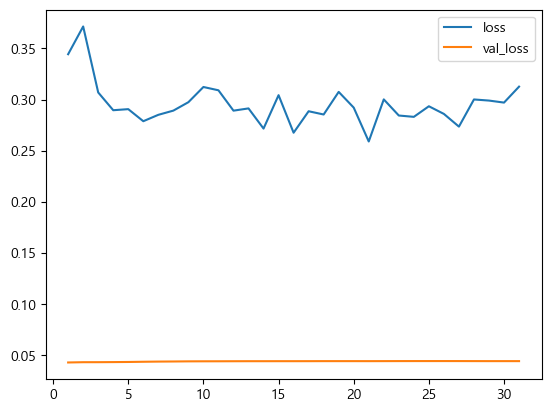

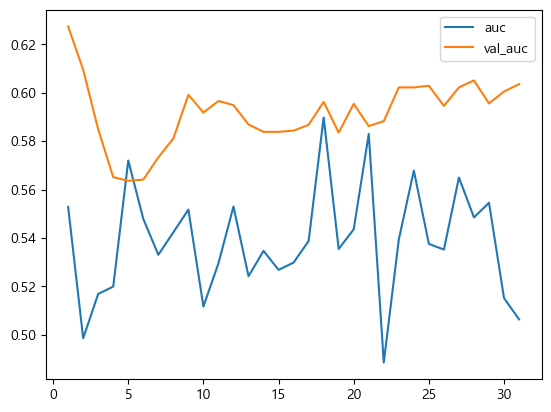

In [74]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['auc', 'val_auc']].plot()

In [75]:
preds_eval = []
for model in models:
    preds_eval.append(model.predict(x))
    
print(classification_report(y, np.round(np.average(np.array(preds_eval),axis=0))))

              precision    recall  f1-score   support

           0       0.92      0.27      0.42      1477
           1       0.13      0.83      0.23       200

    accuracy                           0.34      1677
   macro avg       0.53      0.55      0.32      1677
weighted avg       0.83      0.34      0.39      1677

